<div><img width="120px" style="float: right; width: 120px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Controladores PID para mantener el agua libre de radiación<a id="top"></a>

<i><small>Autores: Alberto Díaz Álvarez y Guillermo Iglesias Hernández<br>Última actualización: 2023-10-16</small></i></div>

***

## Introducción

En el vasto campo de la ingeniería de control, donde se buscan soluciones para mantener sistemas en equilibrio y funcionando a niveles óptimos, los controladores PID destacan como una de las herramientas más versátiles y ampliamente utilizadas. PID, que significa Proporcional (**P**), Integral (**I**) y Derivativo (**D**), hace referencia a los tres componentes clave que trabajan conjuntamente para corregir el error entre un valor medido y el valor deseado o _set point_. Estos controladores son usados para el mantenimiento de una amplia variedad de sistemas como motores, termostatos y otras maquinarias.

### Objetivos

Los objetivos a cubrir en este notebook son los siguientes:

1. **Entender los componentes básicos** de un controlador PID: Proporcional, Integral y Derivativo.
2. **Aprender cómo implementar** un controlador PID en Python.
3. **Visualizar el comportamiento** del controlador en un escenario realista.

Y no se nos ocurre un escenario más realista que el universo Fallout. ¡Comenzamos!

## Bibliotecas y configuración

Comenzaremos instalando las bibliotecas necesarias. Esto sólo es necesario en el caso de que no tengamos el entorno ya creado.

In [11]:
!pip install matplotlib
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


A continuación importaremos las bibliotecas que se utilizarán a lo largo del notebook.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Forzamos algunos parámetros de configuración

In [3]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (20, 6),'figure.dpi': 64})

***

## Descripción del problema

Dentro del intrincado laberinto de corredores, salas y sistemas del refugio, uno de los desafíos más grandes es garantizar la supervivencia de sus habitantes en un mundo que ha sido profundamente alterado por la guerra nuclear. Una de las principales preocupaciones es el agua. En el exterior, la mayoría de las fuentes de agua están contaminadas con altos niveles de radiación, convirtiéndolas en un peligro mortal para cualquiera que las consuma.

Hemos sido designados ingeniero principal del refugio, y se nos confía la tarea esencial de garantizar un suministro constante de agua limpia y segura para todos. Afortunadamente, contamos con una herramienta avanzada: el «Purificador PID Vault-Tec». Este no es un purificador de agua ordinario. Ha sido diseñado con una tecnología de vanguardia que permite monitorizar y ajustar continuamente la calidad del agua, especialmente su nivel de radiación.

Para hacerlo efectivo, el purificador utiliza un controlador PID. Esta herramienta, aunque suene técnica y complicada, es esencialmente un sistema que trabaja incansablemente para corregir cualquier desviación del nivel ideal de radiación del agua (que es 0 rads). Y es nuestra tarea asegurarnos de que este controlador esté bien calibrado y funcione a la perfección, para que cada gota de agua que llegue a los habitantes del refugio sea pura y segura.

## Desarrollo

Un controlador PID trabaja constantemente para reducir el error entre un valor deseado (o setpoint) y el valor actualmente medido. Lo hace ajustando su salida en función de tres componentes: Proporcional, Integral y Derivativo.

In [4]:
class PIDController:
    def __init__(self, kp=1, ki=0.1, kd=0.01):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.prev_error = 0
        self.integral = 0

    def __call__(self, set_point, measured_value):
        error = set_point - measured_value
        self.integral += error
        derivative = error - self.prev_error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output

La implementación es muy sencilla. El controlador se crea con unas ganancia por cada componente. A la hora de calcular el error estas ganancias se aplicarán a los errores calculados en ese _step_ de tiempo:

- `error`: El error en ese preciso instante.
- `integral`: La suma de cada uno de los errores en cada _step_ de tiempo.
- `derivative`: La diferencia entre el error anterior y el actual.

## Ejemplo de uso

Comenzaremos estableciendo el nivel deseado de radiación como valor objetivo para nuestro ejemplo.

In [5]:
set_point = 0

Vamos a crear un controlador que se encargará de controlar que el nivel de radiación se mantiene estable.

In [6]:
controller = PIDController()

Ahora imaginemos que, tras 10 segundos de agua pura hay un aumento repentino durante 10 segundos en la radiación que contiene. Lo representaremos como una lista con los valores de la serie temporal en cada instante de tiempo.

In [7]:
rad_levels = [0] * 10 + [10] * 10
print(f'Niveles de radiación: {rad_levels}')

Niveles de radiación: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


Veamos cómo reacciona nuestro controlador ante esto.

Simulando un aumento repentino en la radiación...

Tiempo(s)	Radiación(rads)	Salida del Purificador
0		0			0.00
1		0			0.00
2		0			0.00
3		0			0.00
4		0			0.00
5		0			0.00
6		0			0.00
7		0			0.00
8		0			0.00
9		0			0.00
10		10			-11.10
11		10			-12.00
12		10			-13.00
13		10			-14.00
14		10			-15.00
15		10			-16.00
16		10			-17.00
17		10			-18.00
18		10			-19.00
19		10			-20.00


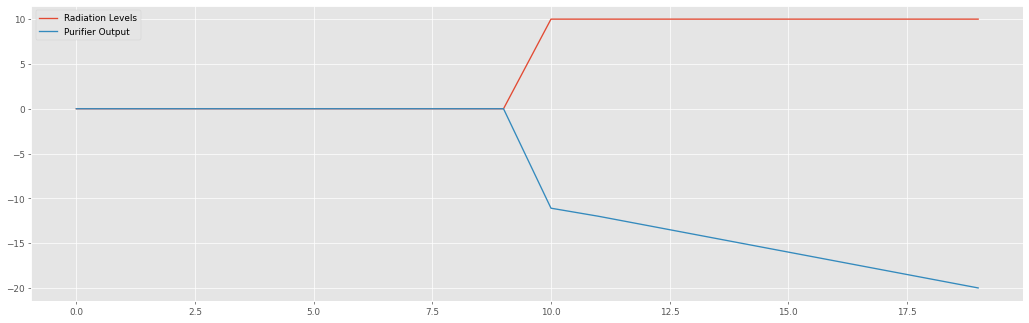

In [8]:
outputs = []

print("Simulando un aumento repentino en la radiación...\n")
print("Tiempo(s)\tRadiación(rads)\tSalida del Purificador")

for t, r in enumerate(rad_levels):
    output = controller(set_point, r)
    outputs.append(output)
    print(f"{t}\t\t{r}\t\t\t{output:.2f}")

plt.plot(rad_levels, label='Radiation Levels')
plt.plot(outputs, label='Purifier Output')
plt.legend()
plt.show()

Este sistema es un ejemplo de sistema de lazo abierto, ya que la salida del controlador afecta al sistema. Supongamos el el sistema es de lazo cerrado (en este caso, la corrección realizada por el purificador), esto es, que la salida del controlador afecta directamente al sistema (los inveles de radiación), y que por lo tanto la respuesta del sistema (los niveles corregidos de radiación) se retroalimenta de nuevo al controlador. Veamos cómo se comportaría en este escenario.

Para ello, vamos a hacer que los niveles de radiación se vean incrementados en un par de momentos para ver cómo se estabiliza el sistema.

In [9]:
rad_levels = [0] + [10] + [0] * 10 + [5] + [0] * 10
print(f'Niveles de radiación: {rad_levels}')

Niveles de radiación: [0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Con esto crearemos nuestro controador, que trabajará para llevar de nuevo el sistema al valor objetivo deseado.

Simulando un aumento repentino en la radiación en un sistema de lazo cerrado...

Tiempo(s)	Radiación(rads)	Corrección	Nivel actual(rads)
0		0			0.00		0.00
1		10			0.00		10.00
2		0			-11.10		-1.10
3		0			0.32		-0.78
4		0			-0.04		-0.82
5		0			0.09		-0.73
6		0			0.07		-0.66
7		0			0.07		-0.59
8		0			0.06		-0.53
9		0			0.05		-0.48
10		0			0.05		-0.43
11		0			0.04		-0.39
12		5			0.04		4.65
13		0			-5.51		-0.86
14		0			0.19		-0.67
15		0			0.01		-0.66
16		0			0.07		-0.59
17		0			0.06		-0.54
18		0			0.05		-0.48
19		0			0.05		-0.43
20		0			0.04		-0.39
21		0			0.04		-0.35
22		0			0.04		-0.32


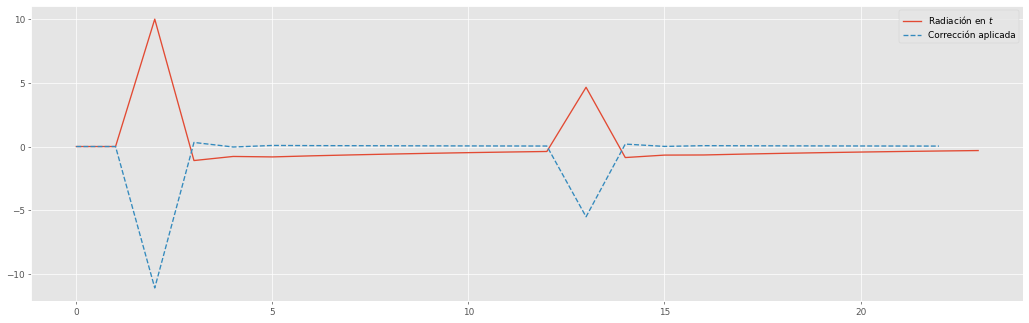

In [10]:
controller = PIDController()

current_radiation = [rad_levels[0]]
corrections_applied = []

print("Simulando un aumento repentino en la radiación en un sistema de lazo cerrado...\n")
print("Tiempo(s)\tRadiación(rads)\tCorrección\tNivel actual(rads)")

for t, r in enumerate(rad_levels):
    # La corrección que el controlador intenta aplicar
    correction = controller(set_point, current_radiation[-1])

    current_radiation.append(current_radiation[-1] + r + correction)
    corrections_applied.append(correction)
    
    print(f"{t}\t\t{r}\t\t\t{correction:.2f}\t\t{current_radiation[-1]:.2f}")

# Gráfico de los niveles de radiación y los niveles corregidos
plt.plot(current_radiation, label='Radiación en $t$')
plt.plot(corrections_applied, label='Corrección aplicada', linestyle='--')
plt.legend()
plt.show()

## Conclusiones

Los controladores PID, con su capacidad para responder y adaptarse a las variaciones y perturbaciones de un sistema, demuestran ser herramientas imprescindibles en muchos campos de la ingeniería. En nuestro ejemplo, la supervivencia de los habitantes del refugio dependía directamente de la eficacia del controlador. Aunque es una representación ficticia, subraya la relevancia y el impacto potencial de estas herramientas en situaciones críticas. Podemos destacar:

1. **Importancia del Control**: En un ambiente tan hostil y cambiante, tener herramientas que permitan un ajuste constante y preciso es vital. El controlador PID emerge como una solución robusta para garantizar que variables críticas, como los niveles de radiación en el agua, permanezcan dentro de límites seguros.
2. **Dinámica de los Componentes PID**: Cada componente del PID tiene un papel fundamental en el comportamiento del controlador:
    - El componente Proporcional actúa directamente en función del error presente, proporcionando una respuesta inmediata.
    - El componente Integral asegura que los errores persistentes y acumulados se corrijan a lo largo del tiempo, evitando desviaciones sistemáticas.
    - El componente Derivativo anticipa el comportamiento futuro del error, contribuyendo a una corrección más suave y evitando oscilaciones.
3. **Lazo Cerrado vs Lazo Abierto**: Hemos visto que en un sistema de lazo cerrado, el controlador tiene una retroalimentación constante sobre el estado actual del sistema. Esto permite una adaptabilidad y corrección más efectivas en comparación con sistemas de lazo abierto, donde no hay retroalimentación.
4. **Aplicabilidad Generalizada**: Aunque este ejemplo se centró en el escenario de Fallout, los principios subyacentes de los controladores PID son aplicables en una amplia variedad de situaciones y disciplinas, desde sistemas de climatización en edificios hasta regulación de velocidad en vehículos.
5. **Aprendizaje Continuo**: Es esencial entender que, si bien un controlador PID es potente, su eficacia depende en gran medida de su sintonización adecuada. La elección correcta de los parámetros $Kp$​, $Ki$​, y $Kd$​ puede variar según el sistema y las condiciones operativas. Experimentar y aprender de los resultados es una parte intrínseca de la ingeniería de control.

***

<div><img style="float: right; width: 120px; vertical-align:top" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" alt="Creative Commons by-nc-sa logo" />

[Volver al inicio](#top)

</div>